##### Контрольная работа №4. Жабина Екатерина ПИ22-4

# Бизнес-задача: Прогнозирование инсульта головного мозга 🧠
### Задача машинного обучения: Бинарная классификация
#### Ссылка на датасет: https://www.kaggle.com/code/emreiekyurt/brain-stroke-prediction/input

### Первичный анализ данных:

Выполняем импортирование необходимых библиотек для дальнейшей работы:

In [19]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [20]:
data=pd.read_csv('brain_stroke.csv')

Визуализируем полученные данные и посмотрим, какие признаки можно было бы использовать для прогнозирования инсульта.

In [21]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


Выведим основную информацию о датасете:

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [23]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

В предоставленных данных нет пропусков.Типы данных для столбцов варьируются от object (строковые данные) до float64 и int64.

### Предобработка данных:

##### Удалим столбцы несвязанные с нашей проблемой:

In [24]:
data = data.drop(["ever_married", "work_type", "Residence_type"], axis =1)

### Разведывательный анализ данных:

### У скольких людей, фигурирующих в этих данных, ранее был инсульт:

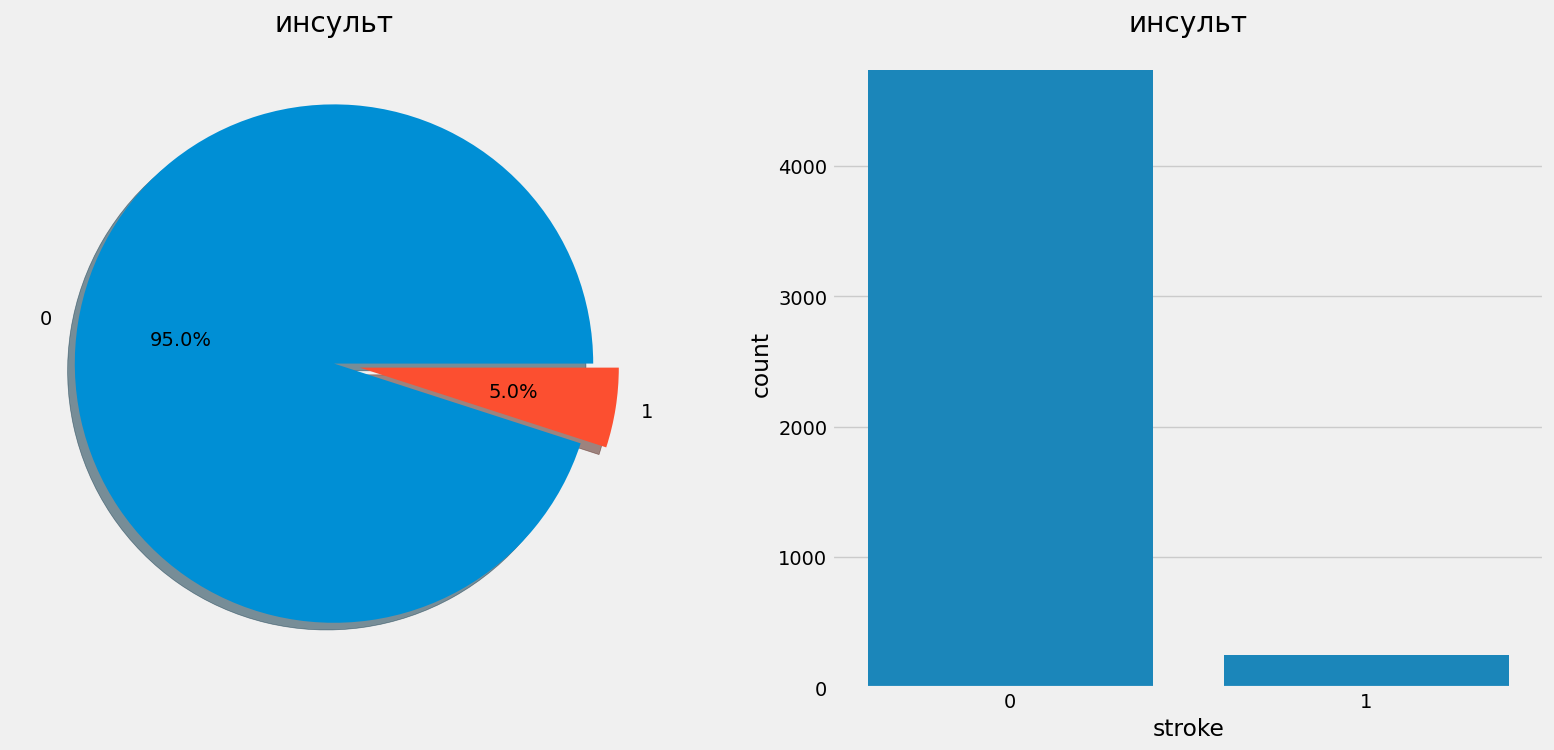

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Построение кругового графика
data['stroke'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('инсульт')
ax[0].set_ylabel('')


sns.countplot(x='stroke', data=data, ax=ax[1])

ax[1].set_title('инсульт')
plt.show()

### Видно что класс (stroke) не сбалансирован

### Можно заметить что класс(stroke) не сбалансирован

### Категориальный признак: пол (gender)

In [26]:
data.groupby(['gender','stroke'])['stroke'].count()

gender  stroke
Female  0         2767
        1          140
Male    0         1966
        1          108
Name: stroke, dtype: int64

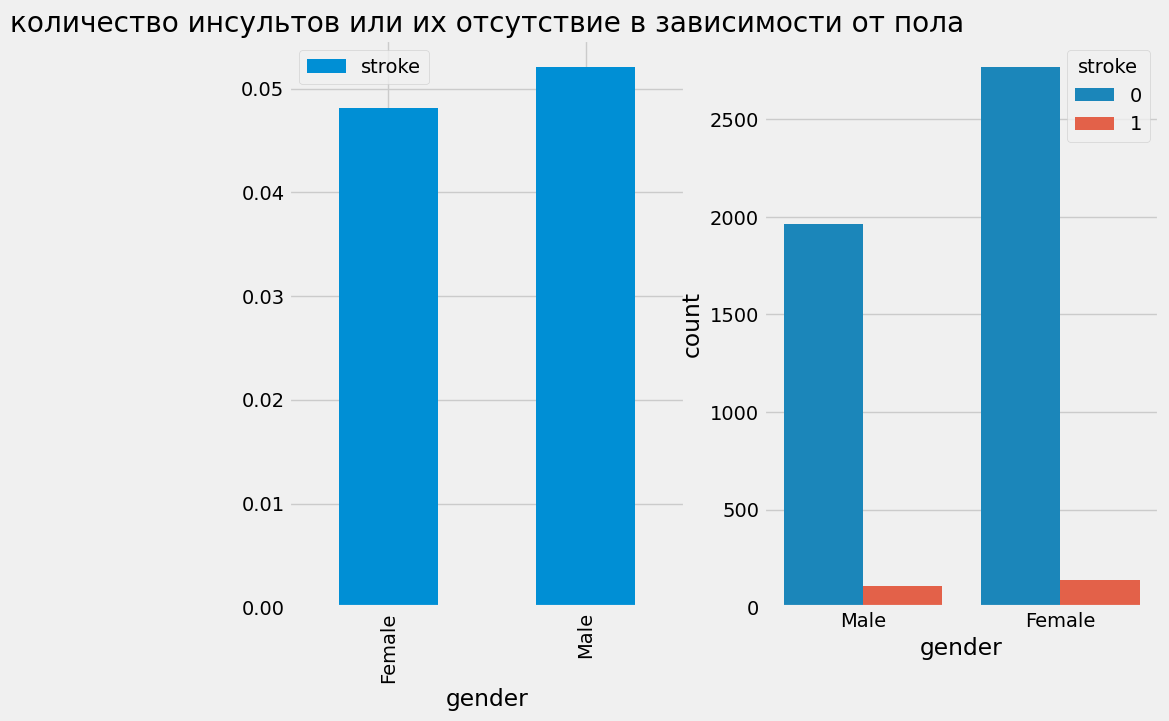

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(1, 2, figsize=(10, 7))

# Построение столбчатого графика с использованием mean для группировки по полу
data[['gender', 'stroke']].groupby(['gender']).mean().plot.bar(ax=ax[0])
ax[0].set_title('количество инсультов или их отсутствие в зависимости от пола')

sns.countplot(x='gender', hue='stroke', data=data, ax=ax[1])

plt.show()

#### Похоже, что мужчины и женщины, у которых был инсульт в данных, сбалансированы (не совсем, но разница не велика). Также видно, что очень мало людей обоих полов имели инсульт.

### Категориальный признак: гипертония (hypertansion):

In [28]:
data.groupby(['hypertension','stroke'])['stroke'].count()

hypertension  stroke
0             0         4320
              1          182
1             0          413
              1           66
Name: stroke, dtype: int64

Среди тех, кто имеет гипертонию (hypertension = 1), инсульты встречаются значительно чаще. Из 413 человека с гипертонией, у 66 человек был инсульт (stroke = 1). Это соотношение значительно выше, чем среди людей без гипертонии, где инсульты встречаются гораздо реже.

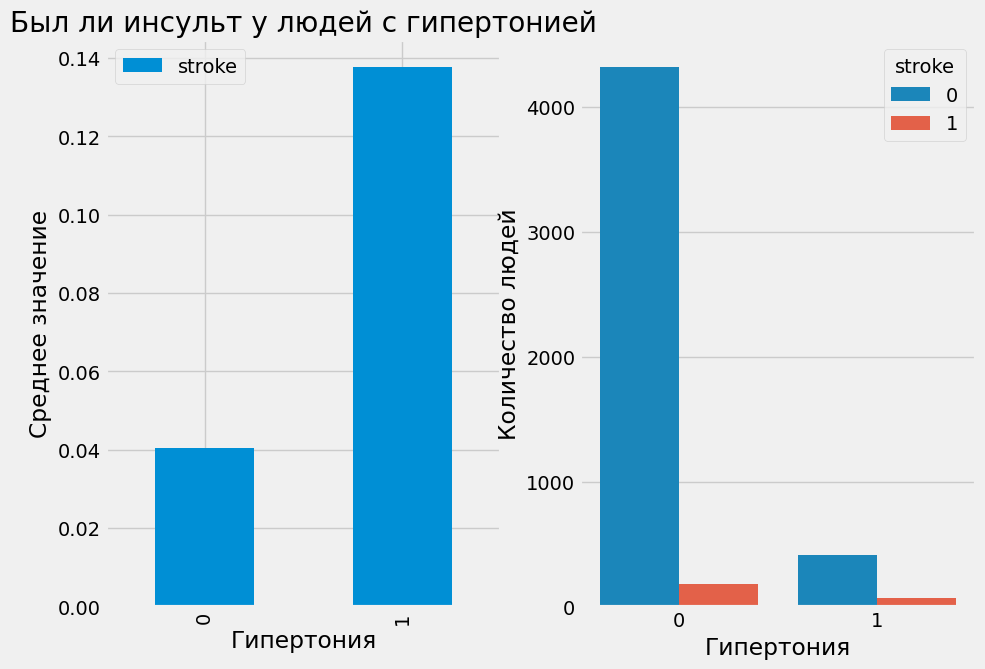

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(1, 2, figsize=(10, 7))

# Построение столбчатого графика с использованием mean для группировки по гипертонии
data[['hypertension', 'stroke']].groupby(['hypertension']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Был ли инсульт у людей с гипертонией')
ax[0].set_xlabel('Гипертония')  
ax[0].set_ylabel('Среднее значение')  
# Исправленный вызов countplot
sns.countplot(x='hypertension', hue='stroke', data=data, ax=ax[1])
ax[1].set_xlabel('Гипертония')  
ax[1].set_ylabel('Количество людей')  

plt.show()

Итак, если мы посмотрим на визуализацию, то увидим, что в случае гипертонии или ее отсутствия частота инсульта очень похожа.

### Категориальный признак: болезни сердца (Heart Disease):

In [30]:
data.groupby(['heart_disease','stroke'])['stroke'].count()

heart_disease  stroke
0              0         4505
               1          201
1              0          228
               1           47
Name: stroke, dtype: int64

Среди тех, кто имеет сердечно-сосудистые заболевания (heart_disease = 1), инсульты встречаются значительно чаще. Из 228 человека с сердечно-сосудистыми заболеваниями, у 47 человек был инсульт (stroke = 1). Это соотношение значительно выше, чем среди людей без сердечно-сосудистых заболеваний, где инсульты встречаются гораздо реже.

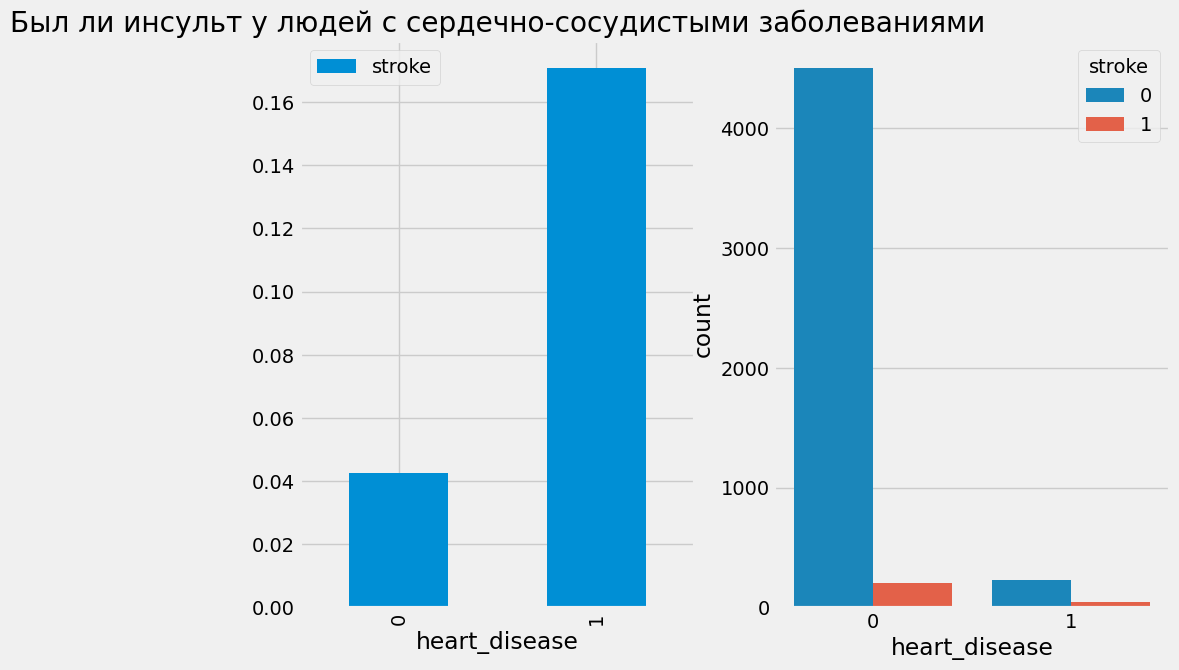

In [31]:
f, ax = plt.subplots(1, 2, figsize=(10, 7))

# Построение столбчатого графика с использованием mean для группировки по сердечно-сосудистым заболеваниям
data[['heart_disease', 'stroke']].groupby(['heart_disease']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Был ли инсульт у людей с сердечно-сосудистыми заболеваниями')

# Исправленный вызов countplot
sns.countplot(x='heart_disease', hue='stroke', data=data, ax=ax[1])

plt.show()

### Категориальный признак: статус курения(Smoking Status)

In [32]:
pd.crosstab(data.smoking_status,data.stroke,margins=True).style.background_gradient(cmap='summer_r')

stroke,0,1,All
smoking_status,,,
Unknown,1453,47,1500
formerly smoked,797,70,867
never smoked,1749,89,1838
smokes,734,42,776
All,4733,248,4981


#### formerly smoked: у 8% был инсульт

#### never smoked: у 4% был инсульт

#### smokes: у 5% был инсульт

#### unknown: у 3% был инсульт

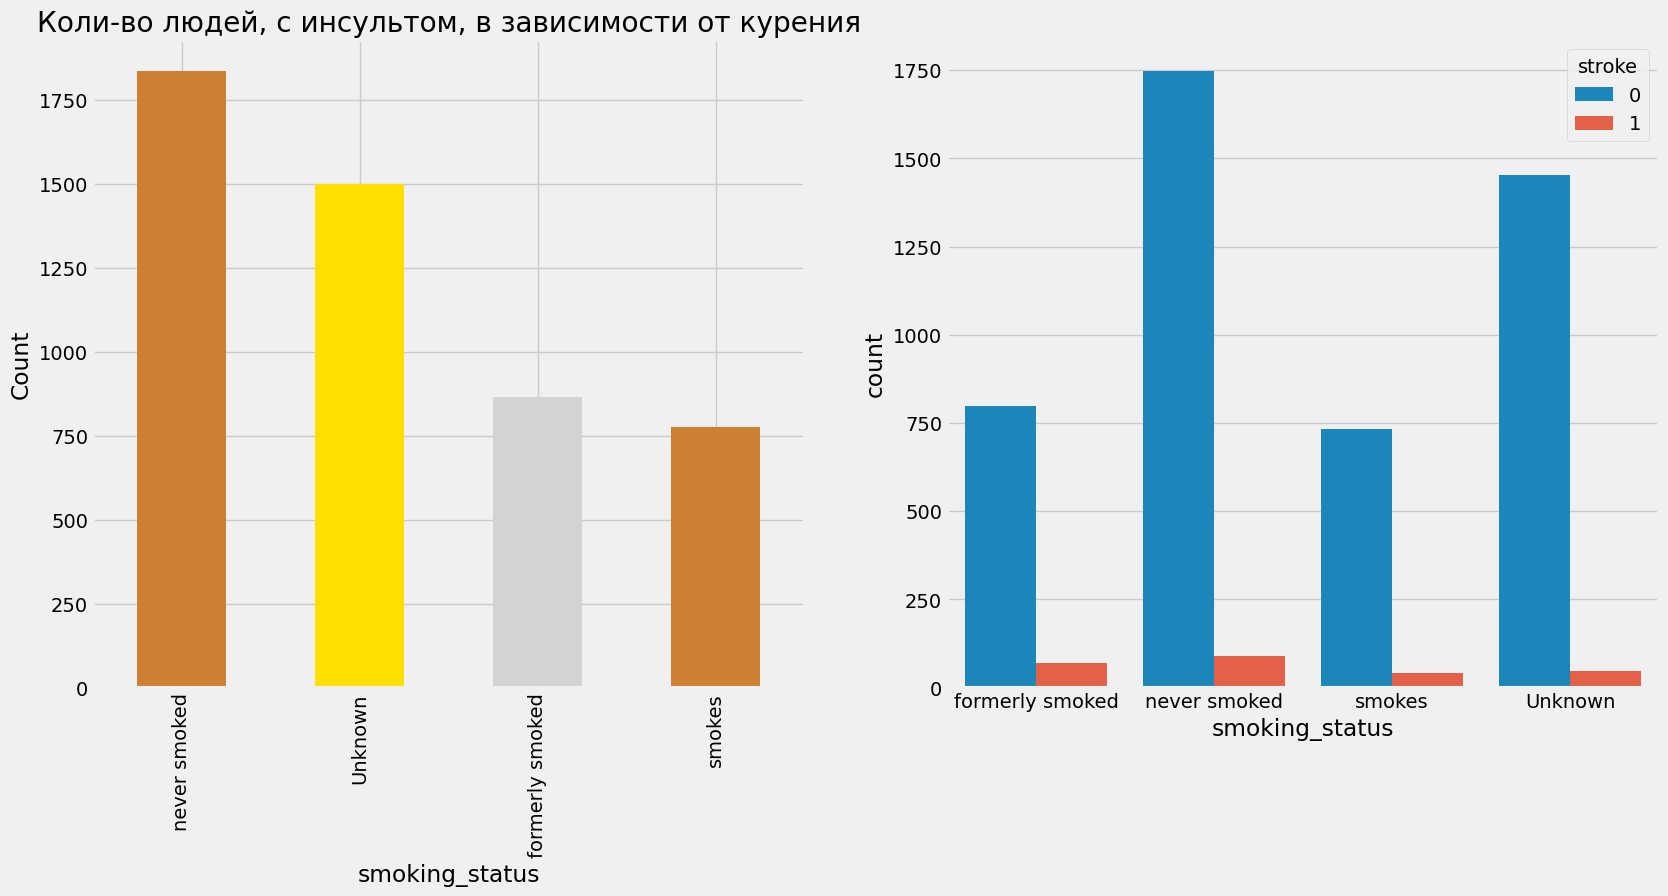

In [33]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Построение столбчатого графика количества людей по статусу курения
data['smoking_status'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Коли-во людей, с инсультом, в зависимости от курения')
ax[0].set_ylabel('Count')

# Использование seaborn для построения графика распределения статуса курения с учетом инсульта
sns.countplot(x='smoking_status', hue='stroke', data=data, ax=ax[1])


plt.show()

#### Можно также посмотреть на связь между полом и статусом курения на инсульт.

In [34]:
pd.crosstab([data.gender,data.stroke],data.smoking_status,margins=True).style.background_gradient(cmap='summer_r')

#### Из курящих женщин процент тех кто перенес иснульт и регулярнко курит 4%

#### Из курящих мужчин процент тех кто перенес иснульт и регулярнко курит 7%

### Признак: возраст(Age)

In [35]:
print('Самый взрослый человек:',data['age'].max(),'Года')
print('Самый молодой:',data['age'].min(),'Года')
print('Средний ворзраст в наших данных:',data['age'].mean(),'Года')

Самый взрослый человек: 82.0 Года
Самый молодой: 0.08 Года
Средний ворзраст в наших данных: 43.41985946597069 Года


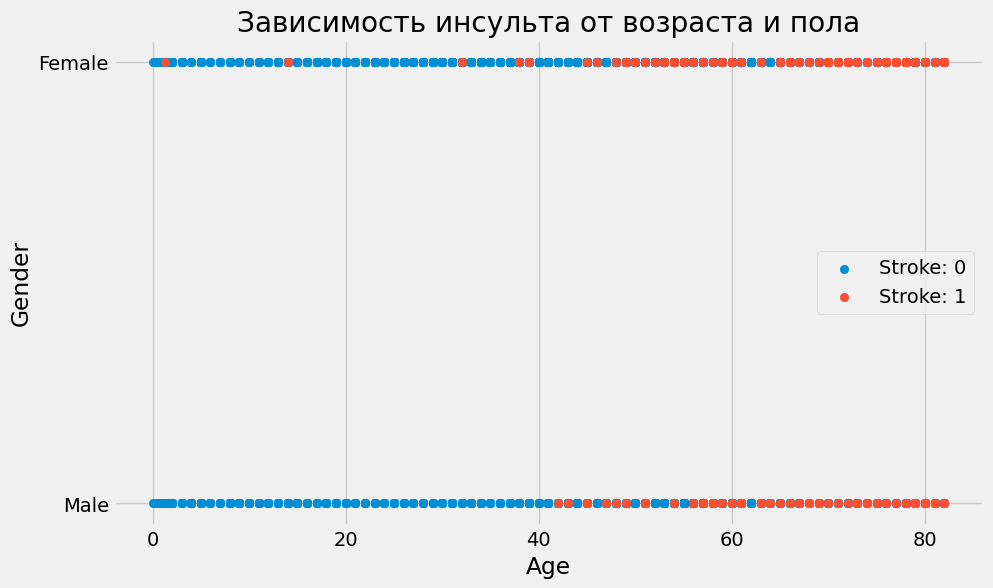

In [36]:
groups = data.groupby('stroke')


plt.figure(figsize=(10, 6))
for name, group in groups:
    plt.scatter(group['age'], group['gender'], label=f'Stroke: {name}')
plt.xlabel('Age')
plt.ylabel('Gender')
plt.title('Зависимость инсульта от возраста и пола')
plt.legend()
plt.show()

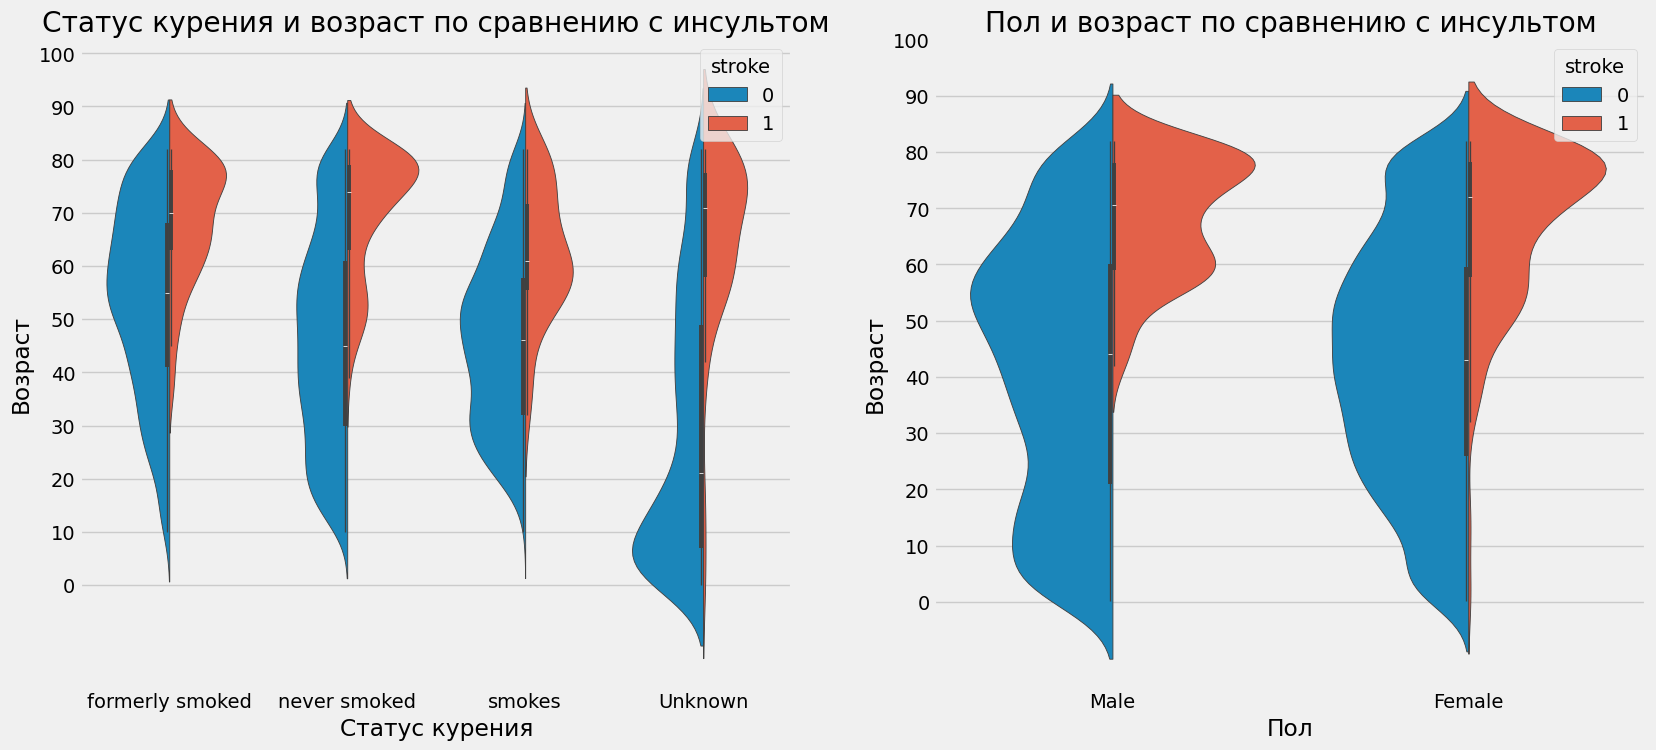

In [37]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.violinplot(x="smoking_status", y="age", hue="stroke", data=data, split=True, ax=ax[0])
ax[0].set_title('Статус курения и возраст по сравнению с инсультом')
ax[0].set_yticks(range(0, 110, 10))
ax[0].set_xlabel('Статус курения')  
ax[0].set_ylabel('Возраст')  

sns.violinplot(x="gender", y="age", hue="stroke", data=data, split=True, ax=ax[1])
ax[1].set_title('Пол и возраст по сравнению с инсультом')
ax[1].set_yticks(range(0, 110, 10))
ax[1].set_xlabel('Пол')  
ax[1].set_ylabel('Возраст')  

plt.show()

#### Можно заметить, что с увеличением возраста увеличивается и вероятность возникновения инсульта. У людей старше 40 лет, независимо от статуса курения и пола, высока вероятность инсульта. Похоже, что большинство людей страдают от инсульта в возрасте 80 лет.

### Признаки: Средний уровень глюкозы и индекс массы тела (BMI). (Average Glucose Level and BMI (Body Mass Index))

In [38]:
print('Максимальный "Средний уровень глюкозы" в данных:', data['avg_glucose_level'].max())
print('Минимальный "Средний уровень глюкозы" в данных:', data['avg_glucose_level'].min())
print('Средний "Средний уровень глюкозы" в данных:', data['avg_glucose_level'].mean())
print("***************************************")
print('Максимальный "Индекс массы тела" в данных:', data['bmi'].max())
print('Минимальный "Индекс массы тела" в данных:', data['bmi'].min())
print('Средний "Индекс массы тела" в данных:', data['bmi'].mean())

Максимальный "Средний уровень глюкозы" в данных: 271.74
Минимальный "Средний уровень глюкозы" в данных: 55.12
Средний "Средний уровень глюкозы" в данных: 105.94356153382854
***************************************
Максимальный "Индекс массы тела" в данных: 48.9
Минимальный "Индекс массы тела" в данных: 14.0
Средний "Индекс массы тела" в данных: 28.498173057618956


### Можно посмотреть плотность статуса курения по среднему уровню глюкозы в графиках.

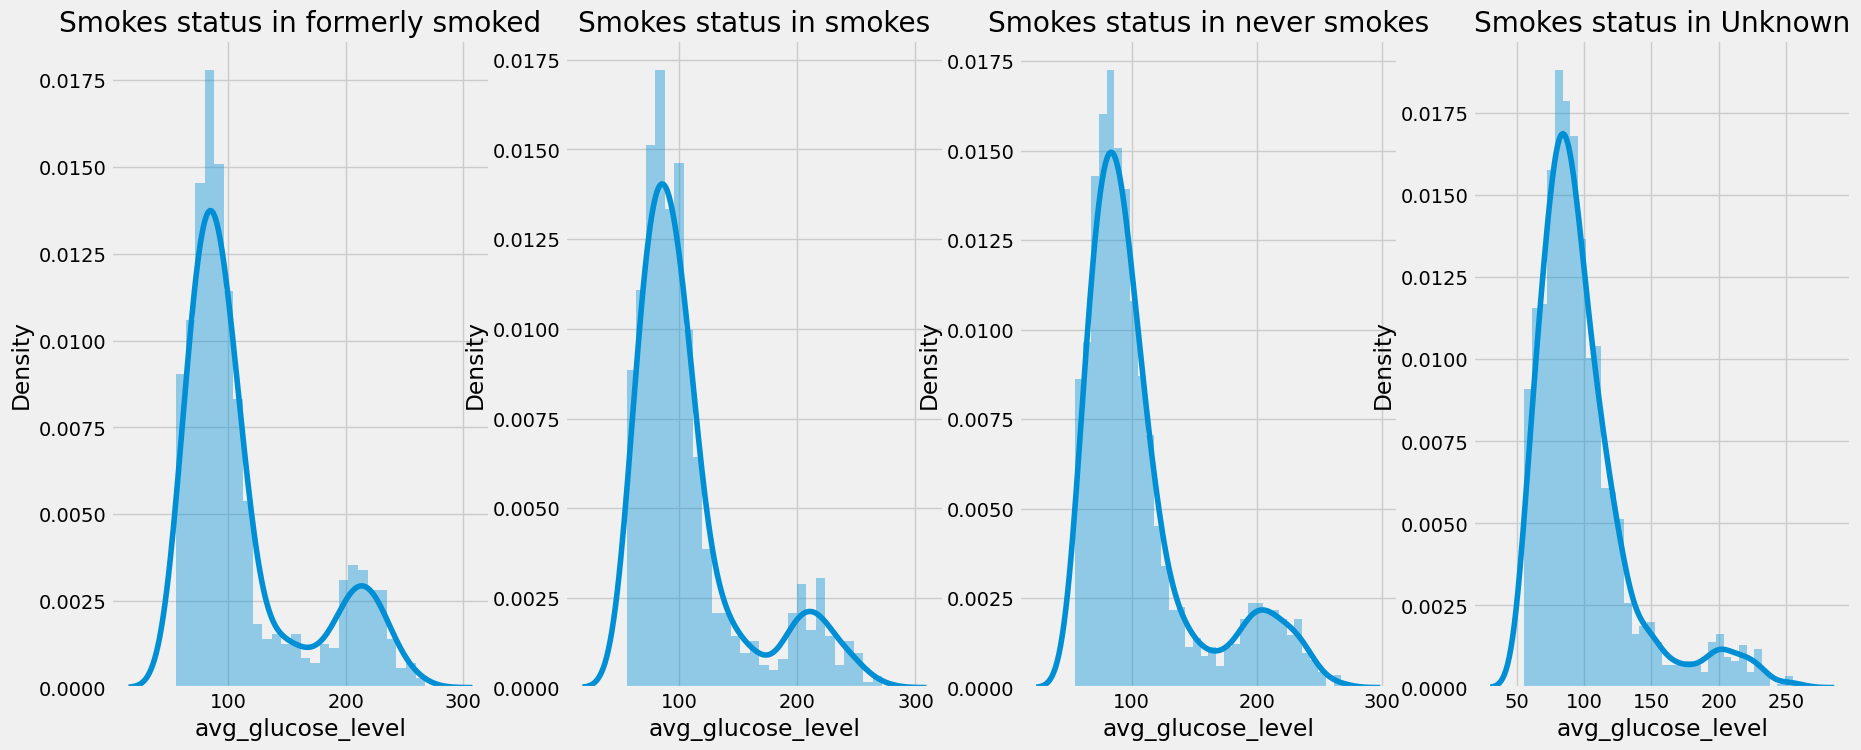

In [39]:
f,ax=plt.subplots(1,4,figsize=(20,8))
sns.distplot(data[data['smoking_status']=="formerly smoked"].avg_glucose_level,ax=ax[0])
ax[0].set_title('Smokes status in formerly smoked')
sns.distplot(data[data['smoking_status']=="smokes"].avg_glucose_level,ax=ax[1])
ax[1].set_title('Smokes status in smokes')
sns.distplot(data[data['smoking_status']== "never smoked"].avg_glucose_level,ax=ax[2])
ax[2].set_title('Smokes status in never smokes')
sns.distplot(data[data['smoking_status']== "Unknown"].avg_glucose_level,ax=ax[3])
ax[3].set_title('Smokes status in Unknown')
plt.show()

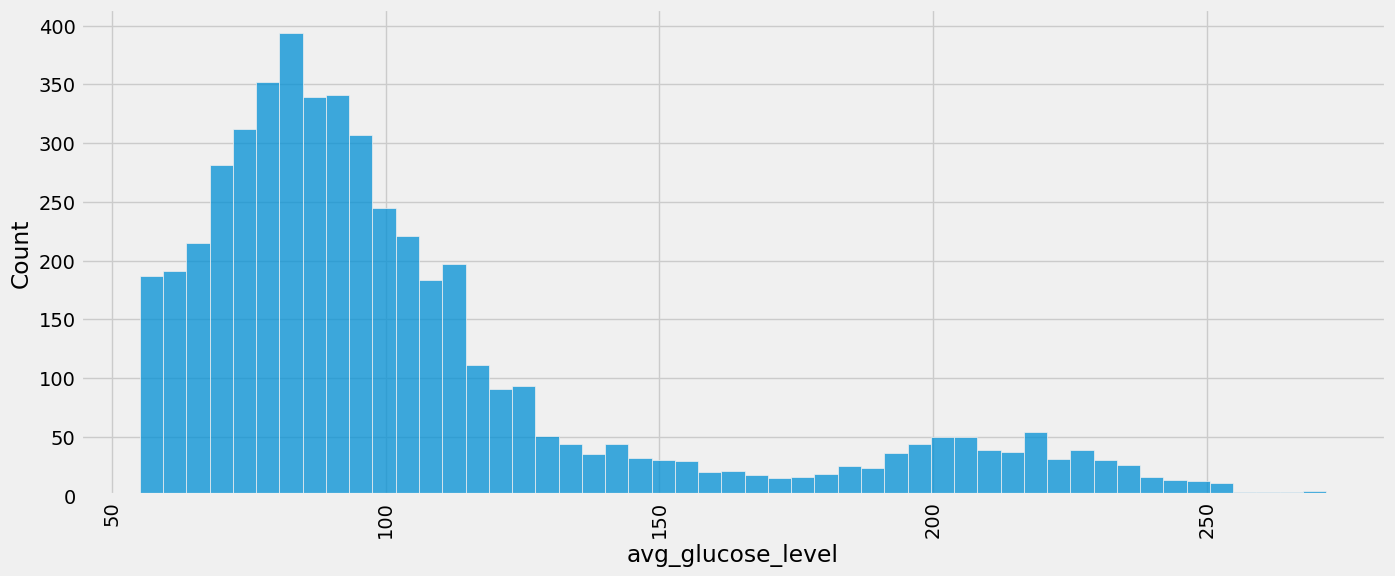

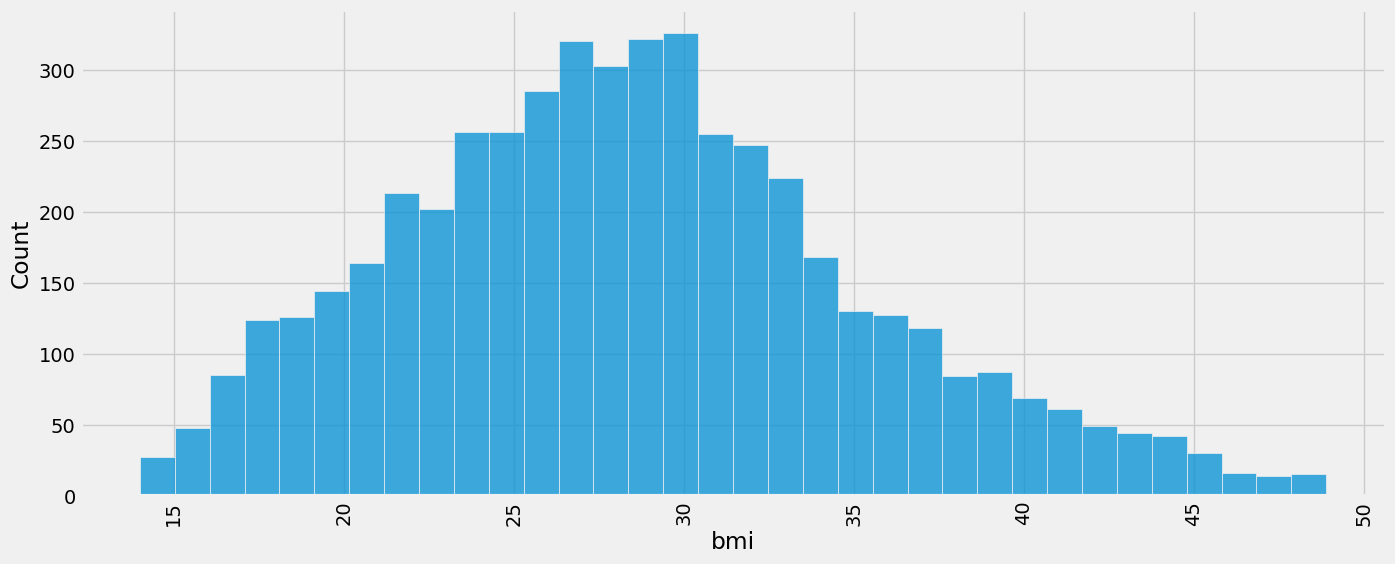

In [40]:
df_num = data[['avg_glucose_level', 'bmi']]


for i in df_num.columns:
    plt.figure(figsize = (15,6))
    sns.histplot(df_num[i], palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

### Можно посмотреть какие характеристики между собой наиболее связаны.

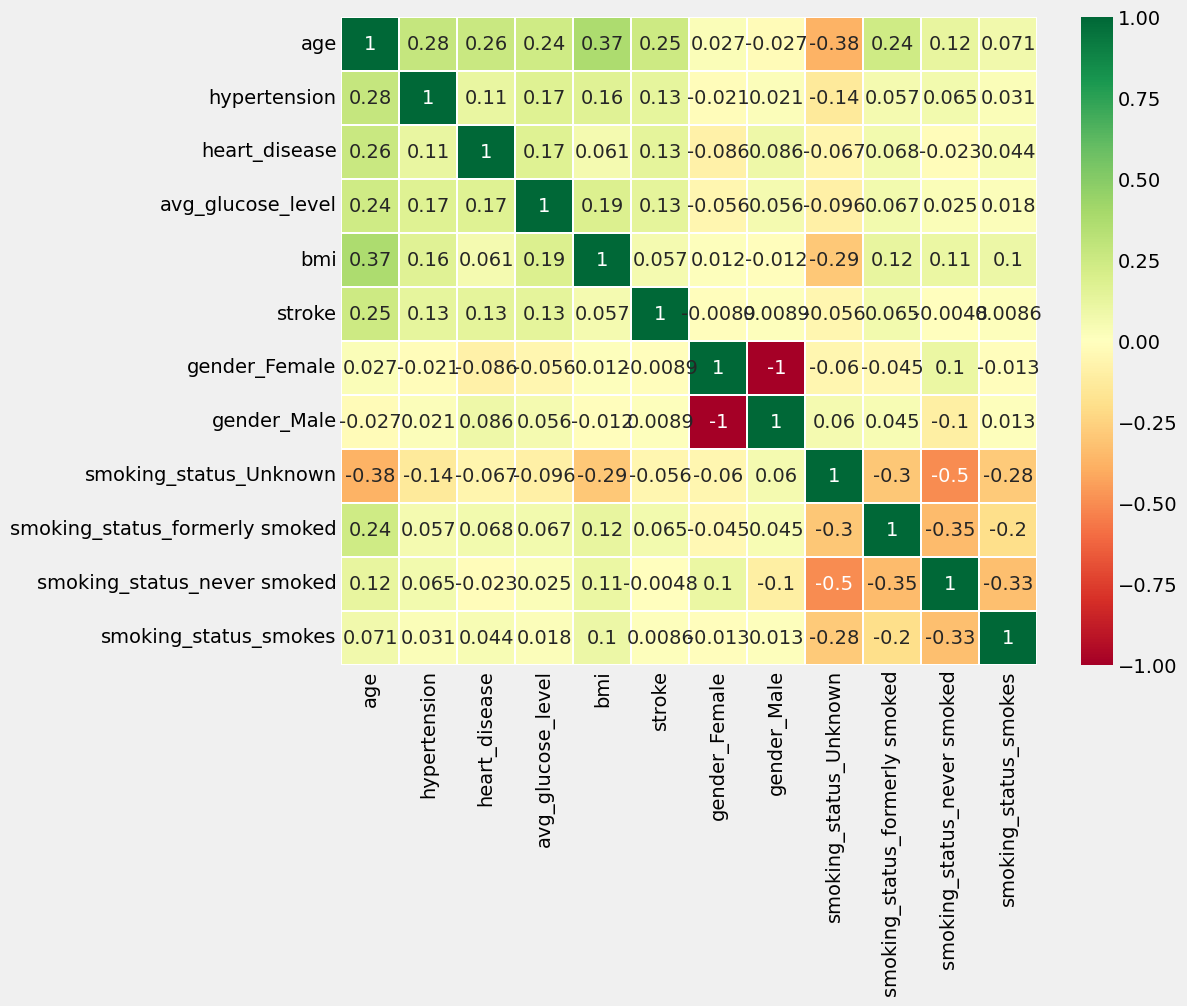

In [41]:
data1 = pd.get_dummies(data, columns=['gender', 'smoking_status'])

# Рассчитываем матрицу корреляции
corr_matrix = data1.corr()

# Выводим тепловую карту корреляции
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

### Похоже, что индекс массы тела (BMI) не имеет большой связи с целевой переменной

### Feature Engineering и Data Preparation:

### Нужно преобразовать некоторые признаки  в категориальные, используя группировку. 

In [42]:
data.insert(2,'age_band', np.zeros)
display(data.head())

,gender,age,age_band,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,<built-in function zeros>,0,1,228.69,36.6,formerly smoked,1
1,Male,80.0,<built-in function zeros>,0,1,105.92,32.5,never smoked,1
2,Female,49.0,<built-in function zeros>,0,0,171.23,34.4,smokes,1
3,Female,79.0,<built-in function zeros>,1,0,174.12,24.0,never smoked,1
4,Male,81.0,<built-in function zeros>,0,0,186.21,29.0,formerly smoked,1


In [43]:
data.loc[data['age']<=16,'age_band']=0
data.loc[(data['age']>16)&(data['age']<=32),'age_band']=1
data.loc[(data['age']>32)&(data['age']<=48),'age_band']=2
data.loc[(data['age']>48)&(data['age']<=64),'age_band']=3
data.loc[data['age']>64,'age_band']=4
data.drop(columns= "age", inplace=True)
data["age_band"]=data['age_band'].astype(str).astype(int)
data.head()

,gender,age_band,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,4,0,1,228.69,36.6,formerly smoked,1
1,Male,4,0,1,105.92,32.5,never smoked,1
2,Female,3,0,0,171.23,34.4,smokes,1
3,Female,4,1,0,174.12,24.0,never smoked,1
4,Male,4,0,0,186.21,29.0,formerly smoked,1


In [44]:
data['age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,count
age_band,
3,1229
2,1067
4,1020
1,895
0,770


### Видим что в датасете больше всего людей возраста от 48 до 64

### Нормализуем  характеристики "средний уровень глюкозы"(avg_glucose_level) и "индекс массы тела"(bmi):


Нормализация — это процесс приведения данных к общему масштабу, обычно к диапазону от 0 до 1 или от -1 до 1, что позволяет упростить анализ и сравнение данных, поскольку все значения теперь находятся в одном и том же диапазоне.

Цель нормализации — упрощение анализа данных, ускорение обучения моделей машинного обучения и улучшение их производительности, поскольку модели часто работают лучше с нормализованными данными.

In [45]:
data = data.copy()
  

column = 'avg_glucose_level'
column2 = 'bmi'
data[column] = data[column] /data[column].abs().max()
data[column2] = data[column2] /data[column2].abs().max()
  
display(data[column], data[column2])

0       0.841577
1       0.389784
2       0.630124
3       0.640760
4       0.685251
          ...   
4976    0.258151
4977    0.703430
4978    0.349672
4979    0.308898
4980    0.308199
Name: avg_glucose_level, Length: 4981, dtype: float64

0       0.748466
1       0.664622
2       0.703476
3       0.490798
4       0.593047
          ...   
4976    0.609407
4977    0.635992
4978    0.650307
4979    0.613497
4980    0.595092
Name: bmi, Length: 4981, dtype: float64

### Также нужно преобразовать строковые переменные в числовые. Поэтому нам нужно работать и со статусом курения (smoking_status) и с полом (gender):

In [46]:
data['gender'].replace(['Male','Female'],[0,1],inplace=True)
data['gender'].head()

0    0
1    0
2    1
3    1
4    0
Name: gender, dtype: int64

In [47]:
data["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [48]:
data['smoking_status'].replace(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],[0,1,2,3],inplace=True)
data['smoking_status'].head()

0    0
1    1
2    2
3    1
4    0
Name: smoking_status, dtype: int64

### Построение моделей:

Импортируем необходимые библиотеки:

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn import metrics  #accuracy 

#### Разделяем данные на тестовую и тренировочную выборки:

#### Так как классы несбалансированы то будем использовать стратификацию (stratify). Она гарантирует, что распределение целевой переменной (stroke) в тренировочных и тестовых наборах данных будет соответствовать распределению в исходном наборе данных. Стратификация помогает избежать ситуации, когда модель обучается на сильно доминирующем классе и плохо справляется с меньшинством.

In [50]:
train, test=train_test_split(data,test_size=0.3, random_state=42, stratify=data['stroke'])
train_X=train[train.columns[:-1]] # берёте все столбцы, кроме последнего тк последний столбец целевой
train_Y=train[train.columns[-1:]] # берем только последний столбец
test_X=test[test.columns[:-1]]
test_Y=test[test.columns[-1:]]
X=data[data.columns[:-1]] # создаёте общий набор признаков (X)
Y=data["stroke"]
len(train_X), len(train_Y), len(test_X), len(test_Y)

(3486, 3486, 1495, 1495)

In [51]:
display(train_X)

,gender,age_band,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status
4670,1,2,0,0,0.326341,0.488753,1
4605,0,2,1,0,0.342975,0.507157,2
4093,0,0,0,0,0.296423,0.480573,2
4871,0,2,0,0,0.318356,0.611452,0
4592,1,0,0,0,0.399757,0.400818,3
...,...,...,...,...,...,...,...
4049,1,1,0,0,0.224958,0.531697,1
1053,0,3,0,0,0.232502,0.644172,3
3526,1,3,0,0,0.223633,0.586912,2
3051,1,2,0,0,0.317031,0.435583,1


In [52]:
display(train_Y)

,stroke
4670,0
4605,0
4093,0
4871,0
4592,0
...,...
4049,0
1053,0
3526,0
3051,0


### Для оценки модели будем испльзовать accuracy score (точность), f1_score, АUC-ROC

 Accuracy score— это метрика, используемая в машинном обучении для оценки качества классификационных моделей. Она измеряет долю правильных прогнозов, сделанных моделью, по отношению к общему количеству прогнозов. Точность рассчитывается путем деления количества правильных прогнозов на общее количество прогнозов. Это позволяет ответить на вопрос: насколько часто модель делает правильные прогнозы.


 F1-оценка особенно полезна в случаях, когда классы в наборе данных несбалансированы, т.е. один класс значительно превосходит другой по количеству экземпляров. В таких условиях точность (accuracy) может давать искаженное представление о качестве модели, поскольку она просто подсчитывает общее количество правильных предсказаний, не учитывая, сколько было сделано ложных предсказаний. F1-оценка же стремится к балансу между точностью и полнотой, учитывая и количество ложных срабатываний, и количество пропущенных случаев


АUC-ROC (Area Under the Receiver Operating Characteristic Curve) является популярной метрикой для оценки производительности бинарных классификаторов. Она показывает, насколько хорошо модель может отличать положительный класс от отрицательного. AUC-ROC измеряется как площадь под кривой ROC, которая отображает производительность классификатора при различных пороговых значениях.

Кривая ROC показывает соотношение между True Positive Rate (TPR) и False Positive Rate (FPR) при различных пороговых значениях классификации. AUC-ROC варьируется от 0 до 1, где 0,5 указывает на случайное угадывание, а 1 указывает на идеальную производительность. Чем выше значение AUC-ROC, тем лучше модель различает положительные и отрицательные классы.

### Попробуем построить две модели SVM с двумя разными ядрами(rbf, linear)

Линейное ядро предполагает, что данные можно разделить на основе прямой линии (для одномерных данных) или плоскости (для двумерных данных). Это простейший вариант ядра, который позволяет модели легко обрабатывать линейно разделимые данные. Линейное ядро обычно работает быстрее, чем ядра типа RBF, и может быть достаточно для многих задач классификации, особенно когда число признаков велико.

Ядро RBF представляет собой более сложный вариант, который может обрабатывать нелинейные зависимости между признаками и целевой переменной. Это достигается путем преобразования данных в пространство большей размерности, где данные становятся линейно разделимыми. Ядро RBF особенно полезно, когда данные не могут быть легко разделены линейным гиперплоскостью в исходном пространстве признаков.

## <center>SVM:</center>

### SVM с ядром rbf:

In [53]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for SVM(rbf) is ',metrics.accuracy_score(prediction1,test_Y))
f1_score = metrics.f1_score(test_Y, prediction1, average='weighted')
print(f"F1 Score: {f1_score}")

Accuracy for SVM(rbf) is  0.9505016722408027
F1 Score: 0.9263805735625382


### SVM(linear):

In [54]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM(linear) is',metrics.accuracy_score(prediction2,test_Y))
f1_score = metrics.f1_score(test_Y, prediction2, average='weighted')
print(f"F1 Score: {f1_score}")

Accuracy for linear SVM(linear) is 0.9505016722408027
F1 Score: 0.9263805735625382


## <center>Logistic Regression:</center>

In [55]:
model1 = LogisticRegression()
model1.fit(train_X,train_Y)
prediction3=model1.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))
f1_score = metrics.f1_score(test_Y, prediction3, average='weighted')
print(f"F1 Score: {f1_score}")

The accuracy of the Logistic Regression is 0.9505016722408027
F1 Score: 0.9263805735625382


## <center>Decision Tree:</center>

In [56]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))
f1_score = metrics.f1_score(test_Y, prediction4, average='weighted')
print(f"F1 Score: {f1_score}")

The accuracy of the Decision Tree is 0.9063545150501672
F1 Score: 0.9069458445208598


## <center>K-Nearest Neighbours(KNN):</center>

In [57]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))
f1_score = metrics.f1_score(test_Y, prediction5, average='weighted')
print(f"F1 Score: {f1_score}")

The accuracy of the KNN is 0.945819397993311
F1 Score: 0.925209836311397


### Наилучшую точность имеют модели SVM и Logistic Regression

### Проведем диагностику модели логистической регрессии:

In [58]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score

# Расчет F1-скор
f1_score = f1_score(test_Y, prediction3, average='weighted')
print(f"F1 Score: {f1_score}")

# Расчет AUC-ROC
auc_roc = roc_auc_score(test_Y, model1.predict_proba(test_X)[:, 1])
print(f"AUC-ROC: {auc_roc}")

# Анализ ошибок
confusion = confusion_matrix(test_Y, prediction3)
print(f"Confusion Matrix:\n{confusion}")
print(classification_report(test_Y, prediction3))


F1 Score: 0.9263805735625382
AUC-ROC: 0.8282994465260475
Confusion Matrix:
[[1421    0]
 [  74    0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1421
           1       0.00      0.00      0.00        74

    accuracy                           0.95      1495
   macro avg       0.48      0.50      0.49      1495
weighted avg       0.90      0.95      0.93      1495



#### Попробуем подобрать лучшие гиперамаетры для модели Logistic Regression:

In [59]:
from sklearn.model_selection import GridSearchCV

# Определение гиперпараметров для перебора
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
}

# Инициализация модели
model = LogisticRegression(max_iter=1000)

# Инициализация GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Обучение модели с подбором гиперпараметров
grid_search.fit(train_X, train_Y)

# Получение лучших гиперпараметров
best_params = grid_search.best_params_
print(best_params)

# Обучение модели с лучшими гиперпараметрами
best_model = LogisticRegression(C=best_params['C'], penalty=best_params['penalty'], max_iter=1000)
best_model.fit(train_X, train_Y)

# Предсказание на тестовых данных
predictions = best_model.predict(test_X)

# Вывод точности
print(f'The accuracy of the Logistic Regression with optimal parameters is {metrics.accuracy_score(predictions, test_Y)}')
print(f'F1 score of the Logistic Regression with optimal parameters is {metrics.f1_score(predictions, test_Y, average='weighted')}')
confusion = confusion_matrix(test_Y, predictions)

{'C': 0.001, 'penalty': 'l2'}
The accuracy of the Logistic Regression with optimal parameters is 0.9505016722408027
F1 score of the Logistic Regression with optimal parameters is 0.9746227709190671


#### Видим что метрика F1 улучшилась

#### Также для оценки моделей попробуем также использовать кросс-валидацию, она используется для оценки производительности модели на новых данных, которые она ранее не видела. Это позволяет избежать переобучения и дает более реалистичную оценку того, как модель будет работать в условиях реального применения.

In [65]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 
kfold = KFold(n_splits=10) #
cv_mean=[] # Список для хранения средних значений точности для каждого классификатора
accuracy=[] # Список для хранения массивов точностей для каждого классификатора
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'), LogisticRegression(C=0.001, penalty='l2'), KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier()]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    cv_mean.append(cv_result.mean())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':cv_mean},index=classifiers)  

display(new_models_dataframe2)

,CV Mean
Linear Svm,0.950285
Radial Svm,0.950285
Logistic Regression,0.950285
KNN,0.949080
Decision Tree,0.903095


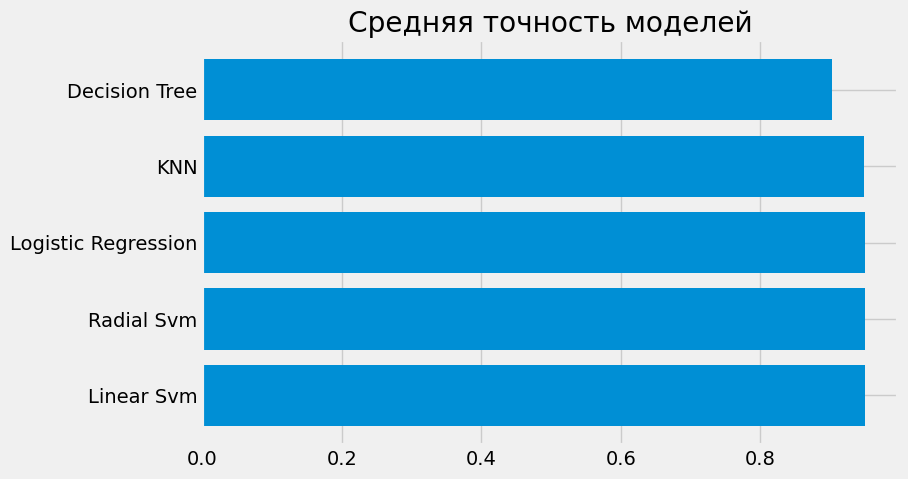

In [67]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Средняя точность моделей')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

### Построим ансамблевую модель машинного обучения:

### С "мягким" голосованием:

Мягкое голосование (Soft Voting): Выходной класс - это прогноз, основанный на среднем значении вероятности, данной этому классу. Пример: для некоторых входных данных три модели дали следующие вероятности прогноза для класса A = (0.30, 0.47, 0.53) и для класса B = (0.20, 0.32, 0.40). Таким образом, среднее значение для класса A составляет 0.4333, а для класса B - 0.3067, победителем явно становится класс A, поскольку он имел наибольшую среднюю вероятность, оцененную каждым классификатором.

In [76]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=5)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y)
print('accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('cross validated score is :',cross.mean())

accuracy for ensembled model is: 0.9505016722408027
cross validated score is : 0.9502108634940564


### С "жестким" голосованием:

Жесткое голосование (Hard Voting): Предсказываемый выходной класс - это класс с наибольшим большинством голосов, то есть класс, который имел наибольшую вероятность быть предсказанным каждым из классификаторов. Например, если три классификатора предсказали классы (A, A, B), то большинство проголосовало за A, поэтому A будет окончательным прогнозом.

In [77]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=5)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='hard').fit(train_X,train_Y)
print('accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('cross validated score is :',cross.mean())

accuracy for ensembled model is: 0.9505016722408027
cross validated score is : 0.9502108634940564


### Вывод: в этой работе я провела первичный и EDA ("Exploratory Data Analysis") анализ данных. Также была произведена предобработка данных для дальнейшего обучения моделей. Были обучены 5 моделей. Также была проведена диагностика этих моделей. После чего эти модели были использованы для ансамбленговой модели. Итогом работы стало построение модели с точностью предсказания инсульта равной  0.9505016722408027